In [10]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
#import ames data for analysis 
df_a=pd.read_csv('Ames_data_8_4_21.csv',index_col=0)

In [4]:
#import dummy data for analysis 
df=pd.read_csv('Ames_dummy_8_4_21.csv',index_col=0)

In [107]:
df_a.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,remodeled,ms_type,age
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,False,1-STORY 1946 & NEWER ALL STYLES,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000,False,1-STORY 1946 & NEWER ALL STYLES,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000,False,1-STORY 1946 & NEWER ALL STYLES,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000,False,1-STORY 1946 & NEWER ALL STYLES,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,True,2-STORY 1946 & NEWER,13


In [7]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,remodeled,age,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Typ

In [21]:
#look to see if there are any columns that have null values
df.columns[df.isna().any()]

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [22]:
#replace null vlaues with 0
df.fillna(0,inplace=True)

In [23]:
#validate the null values went to 0 
df.columns[df.isna().any()]

Index([], dtype='object')

In [24]:
# set up target and ferature varibles 
y=df['SalePrice']
X=df.drop(['SalePrice'], axis=1)

In [169]:
#features for dictionary 
features=[c for c in df.columns if c !='SalePrice']

In [64]:
features

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'remodeled',
 'age',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Pave',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Land Slope_Mod',
 'Land Slope_Sev',

In [170]:
#train test split 
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

In [73]:
#knn=KNeighborsRegressor(n_neighbors=3)

In [2]:
#knn.fit(X_train,y_train)

In [4]:
#knn model 
#print("train set score: {:.2f}".format(knn.score(X_train,y_train)))
#print("test set score: {:.2f}".format(knn.score(X_test,y_test)))

In [76]:
#ridge model 
ridge= Ridge().fit(X_train,y_train)
print("train set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test,y_test)))

train set score: 0.91
test set score: 0.89


In [68]:
#Making a list of ridge features and coefficients 
ridge_dict = {}
for coef, feat in zip(ridge.coef_,features):
    ridge_dict[feat] = coef

In [69]:
#print ridge_dict
ridge_dict 

{'Lot Frontage': -22.671790976627904,
 'Lot Area': 0.49704183111910877,
 'Overall Qual': 8407.312469781895,
 'Overall Cond': 5324.947615722865,
 'Year Built': -168.5984643442442,
 'Year Remod/Add': 23.46235810604745,
 'Mas Vnr Area': 9.242036747051719,
 'BsmtFin SF 1': 3.8357940479254107,
 'BsmtFin SF 2': 12.18240958428898,
 'Bsmt Unf SF': -4.707202699780312,
 'Total Bsmt SF': 11.310987489938546,
 '1st Flr SF': 8.85452384032454,
 '2nd Flr SF': 28.338313759624818,
 'Low Qual Fin SF': -2.5427736120082405,
 'Gr Liv Area': 34.65005163038277,
 'Bsmt Full Bath': 3896.8400875994407,
 'Bsmt Half Bath': -290.9149905370398,
 'Full Bath': 5549.80119263104,
 'Half Bath': 3180.5535824888157,
 'Bedroom AbvGr': -1087.4541357593998,
 'Kitchen AbvGr': -9578.01435788607,
 'TotRms AbvGrd': -553.001786246052,
 'Fireplaces': 7735.319173022992,
 'Garage Yr Blt': -5.370942308241254,
 'Garage Cars': 10325.599665857288,
 'Garage Area': -3.182867801560556,
 'Wood Deck SF': 11.42035043237407,
 'Open Porch SF': -

In [80]:
#Lasso model 
lasso=Lasso().fit(X_train,y_train)
print("train set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test,y_test)))

train set score: 0.93
test set score: 0.83


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461499708495.28436, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


In [83]:
#dicitonary of lasso coefficients
lasso_dict = {}
for coef, feat in zip(lasso.coef_,features):
    lasso_dict[feat] = coef

In [84]:
#Making a list of ridge features and coefficients 
lasso_dict 

{'Lot Frontage': 11.262747946515342,
 'Lot Area': 0.6344054753153895,
 'Overall Qual': 7116.631269467034,
 'Overall Cond': 5982.621599488525,
 'Year Built': 884.1829893049104,
 'Year Remod/Add': 33.85175477722797,
 'Mas Vnr Area': 9.451303408171563,
 'BsmtFin SF 1': 28.046623070000827,
 'BsmtFin SF 2': 26.942713343505382,
 'Bsmt Unf SF': 10.96883131973316,
 'Total Bsmt SF': 6.815940453215903,
 '1st Flr SF': 36.483941753226105,
 '2nd Flr SF': 56.79706080135386,
 'Low Qual Fin SF': 17.899847725134173,
 'Gr Liv Area': 8.380590005791225,
 'Bsmt Full Bath': 1353.2856216927155,
 'Bsmt Half Bath': -3089.9758514993514,
 'Full Bath': 4002.494708029693,
 'Half Bath': 2185.882831353971,
 'Bedroom AbvGr': -1381.862341563642,
 'Kitchen AbvGr': -7714.997129806226,
 'TotRms AbvGrd': -1373.0079720891051,
 'Fireplaces': 7049.338210816085,
 'Garage Yr Blt': -3.2951329679306554,
 'Garage Cars': 5878.99251522669,
 'Garage Area': 8.480528894523626,
 'Wood Deck SF': 9.30018820420573,
 'Open Porch SF': -10.9

In [101]:
#iterate through alpha levels 
alpha=[.0001,.001,.01,.1,1,10]
for i in alpha:
    ridge= Ridge(alpha=i).fit(X_train,y_train)
    print("ridge alpha " + str(i)+" train set score: {:.2f}".format(ridge.score(X_train,y_train)))
    print("ridge alpha "+ str(i)+" test set score: {:.2f}".format(ridge.score(X_test,y_test)))
   

ridge alpha 0.0001 train set score: 0.93
ridge alpha 0.0001 test set score: 0.82
ridge alpha 0.001 train set score: 0.93
ridge alpha 0.001 test set score: 0.82
ridge alpha 0.01 train set score: 0.93
ridge alpha 0.01 test set score: 0.84
ridge alpha 0.1 train set score: 0.92
ridge alpha 0.1 test set score: 0.88
ridge alpha 1 train set score: 0.91
ridge alpha 1 test set score: 0.89
ridge alpha 10 train set score: 0.90
ridge alpha 10 test set score: 0.90


In [103]:
alpha=[.0001,.001,.01,.1,1,10,100,1000]
for i in alpha:
    lasso= Lasso(alpha=i, max_iter=1000).fit(X_train,y_train)
    print("lasso alpha " + str(i)+" train set score: {:.2f}".format(lasso.score(X_train,y_train)))
    print("lasso alpha "+ str(i)+" test set score: {:.2f}".format(lasso.score(X_test,y_test)))
    print("lasso alpha "+ str(i)+ " number of features user: {}".format(np.sum(lasso.coef_!=0)))

/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480506902308.4219, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.0001 train set score: 0.93
lasso alpha 0.0001 test set score: 0.82
lasso alpha 0.0001 number of features user: 261


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480501869598.9477, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.001 train set score: 0.93
lasso alpha 0.001 test set score: 0.82
lasso alpha 0.001 number of features user: 261


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480451120488.28577, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.01 train set score: 0.93
lasso alpha 0.01 test set score: 0.82
lasso alpha 0.01 number of features user: 261


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479994473251.84, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.1 train set score: 0.93
lasso alpha 0.1 test set score: 0.82
lasso alpha 0.1 number of features user: 260


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461499708495.28436, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 1 train set score: 0.93
lasso alpha 1 test set score: 0.83
lasso alpha 1 number of features user: 257


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524841721289.5148, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 10 train set score: 0.92
lasso alpha 10 test set score: 0.87
lasso alpha 10 number of features user: 210


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727717111610.6616, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 100 train set score: 0.90
lasso alpha 100 test set score: 0.89
lasso alpha 100 number of features user: 111
lasso alpha 1000 train set score: 0.84
lasso alpha 1000 test set score: 0.85
lasso alpha 1000 number of features user: 43


In [108]:
#dicitonary for best lasso model to see which coefficents were dropped 
lasso100= Lasso(alpha=100, max_iter=1000).fit(X_train,y_train)
lasso_dict100 = {}
for coef, feat in zip(lasso100.coef_,features):
    lasso_dict100[feat] = coef

/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727717111610.6616, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


In [109]:
#dicitonary for aplha 10 lasso model to see which coefficents were dropped 
lasso10= Lasso(alpha=10, max_iter=1000).fit(X_train,y_train)
lasso_dict10 = {}
for coef, feat in zip(lasso10.coef_,features):
    lasso_dict10[feat] = coef

/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524841721289.5148, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


In [148]:
#dicitonary for aplha 1000 lasso model to see which coefficents were dropped 
lasso1000= Lasso(alpha=1000, max_iter=1000).fit(X_train,y_train)
lasso_dict1000 = {}
for coef, feat in zip(lasso1000.coef_,features):
    lasso_dict1000[feat] = coef

/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727717111610.6616, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


In [149]:

dict_=pd.DataFrame([lasso_dict100])

In [152]:
dict_[dict_>0].T.dropna()

,0
Lot Area,0.449971
Overall Qual,10773.142196
Overall Cond,5688.915928
Year Built,520.800657
Year Remod/Add,97.398752
Mas Vnr Area,14.333944
BsmtFin SF 1,14.797439
BsmtFin SF 2,21.177449
Bsmt Unf SF,4.992891
Total Bsmt SF,4.289711


In [151]:
#pd.set_option('max_rows', None)

In [13]:
df_a

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,remodeled,ms_type,age
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,5,2010,WD,Normal,215000,False,1-STORY 1946 & NEWER ALL STYLES,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,6,2010,WD,Normal,105000,False,1-STORY 1946 & NEWER ALL STYLES,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,12500,6,2010,WD,Normal,172000,False,1-STORY 1946 & NEWER ALL STYLES,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,4,2010,WD,Normal,244000,False,1-STORY 1946 & NEWER ALL STYLES,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,3,2010,WD,Normal,189900,True,2-STORY 1946 & NEWER,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,3,2006,WD,Normal,142500,False,SPLIT OR MULTI-LEVEL,22
2926,20,RL,0.0,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,6,2006,WD,Normal,131000,False,1-STORY 1946 & NEWER ALL STYLES,23
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,700,7,2006,WD,Normal,132000,False,SPLIT FOYER,14
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,4,2006,WD,Normal,170000,True,1-STORY 1946 & NEWER ALL STYLES,32


In [87]:
numeric_df = df_a.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [88]:
numeric_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,remodeled,ms_type,age
0,1.301030,RL,2.149219,4.502017,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-inf,-inf,0.698970,3.303196,WD,Normal,5.332438,False,1-STORY 1946 & NEWER ALL STYLES,1.698970
1,1.301030,RH,1.903090,4.065281,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-inf,-inf,0.778151,3.303196,WD,Normal,5.021189,False,1-STORY 1946 & NEWER ALL STYLES,1.690196
2,1.301030,RL,1.908485,4.154333,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-inf,4.09691,0.778151,3.303196,WD,Normal,5.235528,False,1-STORY 1946 & NEWER ALL STYLES,1.716003
3,1.301030,RL,1.968483,4.047664,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,-inf,-inf,0.602060,3.303196,WD,Normal,5.387390,False,1-STORY 1946 & NEWER ALL STYLES,1.623249
4,1.778151,RL,1.869232,4.140822,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-inf,-inf,0.477121,3.303196,WD,Normal,5.278525,True,2-STORY 1946 & NEWER,1.113943


In [112]:
df_dummies = pd.get_dummies(numeric_df, drop_first=True)

In [115]:
df_dummies.fillna(0,inplace=True)

In [92]:
_inf=[c for c in df_dummies.columns.to_series()[np.isinf(df_dummies).any()]]

In [93]:
_inf

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'age']

In [91]:
#df.replace([np.inf, -np.inf], np.nan,inplace=True)
for i in df_dummies.columns.to_series()[np.isinf(df_dummies).any()]: 
    print('Max ' + str(i) + str(df_dummies[i].max()))
    print('Min ' + str(i) + str(df_dummies[i].min()))

Max Lot Frontage2.4955443375464483
Min Lot Frontage-inf
Max Mas Vnr Area3.2041199826559246
Min Mas Vnr Area-inf
Max BsmtFin SF 13.7515870050823104
Min BsmtFin SF 1-inf
Max BsmtFin SF 23.1835545336188615
Min BsmtFin SF 2-inf
Max Bsmt Unf SF3.3684728384403617
Min Bsmt Unf SF-inf
Max Total Bsmt SF3.786041210242554
Min Total Bsmt SF-inf
Max 2nd Flr SF3.31492005599242
Min 2nd Flr SF-inf
Max Low Qual Fin SF3.0269416279590295
Min Low Qual Fin SF-inf
Max Bsmt Full Bath0.47712125471966244
Min Bsmt Full Bath-inf
Max Bsmt Half Bath0.3010299956639812
Min Bsmt Half Bath-inf
Max Full Bath0.6020599913279624
Min Full Bath-inf
Max Half Bath0.3010299956639812
Min Half Bath-inf
Max Bedroom AbvGr0.9030899869919435
Min Bedroom AbvGr-inf
Max Kitchen AbvGr0.47712125471966244
Min Kitchen AbvGr-inf
Max Fireplaces0.6020599913279624
Min Fireplaces-inf
Max Garage Yr Blt3.343802333161655
Min Garage Yr Blt-inf
Max Garage Cars0.6989700043360189
Min Garage Cars-inf
Max Garage Area3.17260293120986
Min Garage Area-inf


In [100]:
for i in _inf:
    print( df_dummies[i].value_counts())

-inf         490
 1.778151    276
 1.903090    137
 1.845098    133
 1.698970    117
            ... 
 1.342423      1
 2.184691      1
 1.447158      1
 2.068186      1
 2.190332      1
Name: Lot Frontage, Length: 129, dtype: int64
-inf         1771
 2.079181      15
 2.301030      13
 2.245513      13
 2.334454      12
             ... 
 1.806180       1
 2.602060       1
 2.457882       1
 2.760422       1
 2.700704       1
Name: Mas Vnr Area, Length: 445, dtype: int64
-inf         931
 1.380211     27
 1.204120     14
 2.477121      9
 2.459392      8
            ... 
 3.084934      1
 2.633468      1
 2.646404      1
 3.087781      1
 1.690196      1
Name: BsmtFin SF 1, Length: 995, dtype: int64
-inf         2579
 2.468347       5
 2.255273       5
 2.572872       3
 1.857332       3
             ... 
 1.716003       1
 2.448706       1
 2.556303       1
 2.745855       1
 2.269513       1
Name: BsmtFin SF 2, Length: 274, dtype: int64
-inf         245
 2.584331     19
 2.862131   

In [120]:
df_dummies.replace([np.inf, -np.inf], 0,inplace=True)

In [121]:
#X&Y for nomalized data
y2=df_dummies['SalePrice']
X2=df_dummies.drop(['SalePrice'], axis=1)

In [122]:
#features for dictionary 
features=[c for c in df_dummies.columns if c !='SalePrice']

In [123]:
#train test split 
X_train2, X_test2, y_train2, y_test2= train_test_split(X2,y2,random_state=42)

In [124]:
alpha=[.0001,.001,.01,.1,1,10,100,1000]
for i in alpha:
    lasso= Lasso(alpha=i, max_iter=1000).fit(X_train2,y_train2)
    print("lasso alpha " + str(i)+" train set score: {:.2f}".format(lasso.score(X_train2,y_train2)))
    print("lasso alpha "+ str(i)+" test set score: {:.2f}".format(lasso.score(X_test2,y_test2)))
    print("lasso alpha "+ str(i)+ " number of features user: {}".format(np.sum(lasso.coef_!=0)))

lasso alpha 0.0001 train set score: 0.92
lasso alpha 0.0001 test set score: 0.92
lasso alpha 0.0001 number of features user: 142
lasso alpha 0.001 train set score: 0.89
lasso alpha 0.001 test set score: 0.90
lasso alpha 0.001 number of features user: 54
lasso alpha 0.01 train set score: 0.63
lasso alpha 0.01 test set score: 0.68
lasso alpha 0.01 number of features user: 15
lasso alpha 0.1 train set score: 0.00
lasso alpha 0.1 test set score: -0.00
lasso alpha 0.1 number of features user: 0
lasso alpha 1 train set score: 0.00
lasso alpha 1 test set score: -0.00
lasso alpha 1 number of features user: 0
lasso alpha 10 train set score: 0.00
lasso alpha 10 test set score: -0.00
lasso alpha 10 number of features user: 0
lasso alpha 100 train set score: 0.00
lasso alpha 100 test set score: -0.00
lasso alpha 100 number of features user: 0
lasso alpha 1000 train set score: 0.00
lasso alpha 1000 test set score: -0.00
lasso alpha 1000 number of features user: 0


In [126]:
#iterate through alpha levels 
alpha=[.0001,.001,.01,.1,1,10]
for i in alpha:
    ridge= Ridge(alpha=i).fit(X_train2,y_train2)
    print("ridge alpha " + str(i)+" train set score: {:.2f}".format(ridge.score(X_train2,y_train2)))
    print("ridge alpha "+ str(i)+" test set score: {:.2f}".format(ridge.score(X_test2,y_test2)))
   

ridge alpha 0.0001 train set score: 0.94
ridge alpha 0.0001 test set score: 0.86
ridge alpha 0.001 train set score: 0.94
ridge alpha 0.001 test set score: 0.86
ridge alpha 0.01 train set score: 0.94
ridge alpha 0.01 test set score: 0.87
ridge alpha 0.1 train set score: 0.94
ridge alpha 0.1 test set score: 0.90
ridge alpha 1 train set score: 0.93
ridge alpha 1 test set score: 0.92
ridge alpha 10 train set score: 0.92
ridge alpha 10 test set score: 0.92


In [128]:
ridge2= Ridge(alpha=1).fit(X_train2,y_train2)
ridge_dict_reg = {}
for coef, feat in zip(ridge2.coef_,features):
    ridge_dict_reg[feat] = coef

In [129]:
ridge_dict_reg

{'MS SubClass': -0.005884516508084973,
 'Lot Frontage': -0.0014880016839351807,
 'Lot Area': 0.07317218611841338,
 'Overall Qual': 0.2245679326870092,
 'Overall Cond': 0.18511179398888475,
 'Year Built': 0.012654290127205259,
 'Year Remod/Add': 0.011929530238170033,
 'Mas Vnr Area': 0.001447251074269791,
 'BsmtFin SF 1': 0.023428926180219033,
 'BsmtFin SF 2': 0.005493948789728052,
 'Bsmt Unf SF': -0.004801130651877698,
 'Total Bsmt SF': 0.04712170471887638,
 '1st Flr SF': 0.10358818713234073,
 '2nd Flr SF': 0.009785859297967279,
 'Low Qual Fin SF': -0.0026189067601110234,
 'Gr Liv Area': 0.28016907940661345,
 'Bsmt Full Bath': 0.02316960488836204,
 'Bsmt Half Bath': -0.000895061702791713,
 'Full Bath': 0.03624621541885753,
 'Half Bath': -0.02242820285296057,
 'Bedroom AbvGr': 0.007491703193633374,
 'Kitchen AbvGr': -0.05243451127556236,
 'TotRms AbvGrd': -0.0023017662345699392,
 'Fireplaces': 0.030023193127778486,
 'Garage Yr Blt': 0.011779969805972049,
 'Garage Cars': 0.06078540604937

In [166]:
reg_Ridge=pd.DataFrame([ridge_dict_reg]).T

In [167]:
reg_Ridge.T.sort_values(by='0')

KeyError: '0'

In [171]:
reg_Ridge.sort_values(by=0)[-10:]

,0
Roof Matl_CompShg,0.074599
Roof Matl_Tar&Grv,0.076355
Sale Condition_AdjLand,0.079353
Roof Matl_WdShake,0.080679
1st Flr SF,0.103588
Roof Matl_WdShngl,0.125466
Neighborhood_GrnHill,0.134858
Overall Cond,0.185112
Overall Qual,0.224568
Gr Liv Area,0.280169


In [173]:
cormat=numeric_df.corr()
round(cormat,2)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,remodeled,age
MS SubClass,1.00,-0.47,-0.43,0.09,-0.04,0.00,0.05,0.00,-0.05,-0.10,...,0.02,-0.27,-0.07,0.60,-0.03,0.02,-0.02,-0.03,0.01,-0.03
Lot Frontage,-0.47,1.00,0.77,0.15,-0.04,0.08,0.07,0.14,0.17,0.10,...,0.23,0.28,0.11,0.18,0.08,-0.00,-0.01,0.34,-0.00,-0.07
Lot Area,-0.43,0.77,1.00,0.13,-0.04,0.03,0.04,0.16,0.21,0.13,...,0.26,0.27,0.15,0.11,0.13,-0.01,-0.03,0.37,0.03,-0.01
Overall Qual,0.09,0.15,0.13,1.00,0.03,0.57,0.55,0.29,0.17,0.05,...,0.11,0.13,0.17,-0.30,0.20,0.02,-0.02,0.81,-0.10,-0.60
Overall Cond,-0.04,-0.04,-0.04,0.03,1.00,-0.27,0.07,-0.05,-0.03,-0.13,...,-0.07,-0.03,0.06,0.08,0.05,0.02,0.02,0.02,0.20,0.27
Year Built,0.00,0.08,0.03,0.57,-0.27,1.00,0.61,0.06,0.16,0.08,...,0.12,0.03,0.11,-0.33,0.11,0.00,-0.01,0.61,-0.40,-0.86
Year Remod/Add,0.05,0.07,0.04,0.55,0.07,0.61,1.00,0.07,0.09,0.08,...,-0.01,-0.09,0.04,-0.30,0.13,0.01,0.03,0.59,0.08,-0.66
Mas Vnr Area,0.00,0.14,0.16,0.29,-0.05,0.06,0.07,1.00,0.23,-0.02,...,-0.12,0.18,0.04,-0.70,-0.17,-0.03,-0.01,0.34,0.05,-0.06
BsmtFin SF 1,-0.05,0.17,0.21,0.17,-0.03,0.16,0.09,0.23,1.00,-0.43,...,0.11,0.46,0.06,-0.31,0.24,0.00,-0.01,0.30,-0.04,-0.07
BsmtFin SF 2,-0.10,0.10,0.13,0.05,-0.13,0.08,0.08,-0.02,-0.43,1.00,...,0.09,0.60,0.17,0.37,0.03,0.02,-0.04,0.15,-0.01,-0.08


In [ ]:
cormat = df.corr()
round(cormat,2)

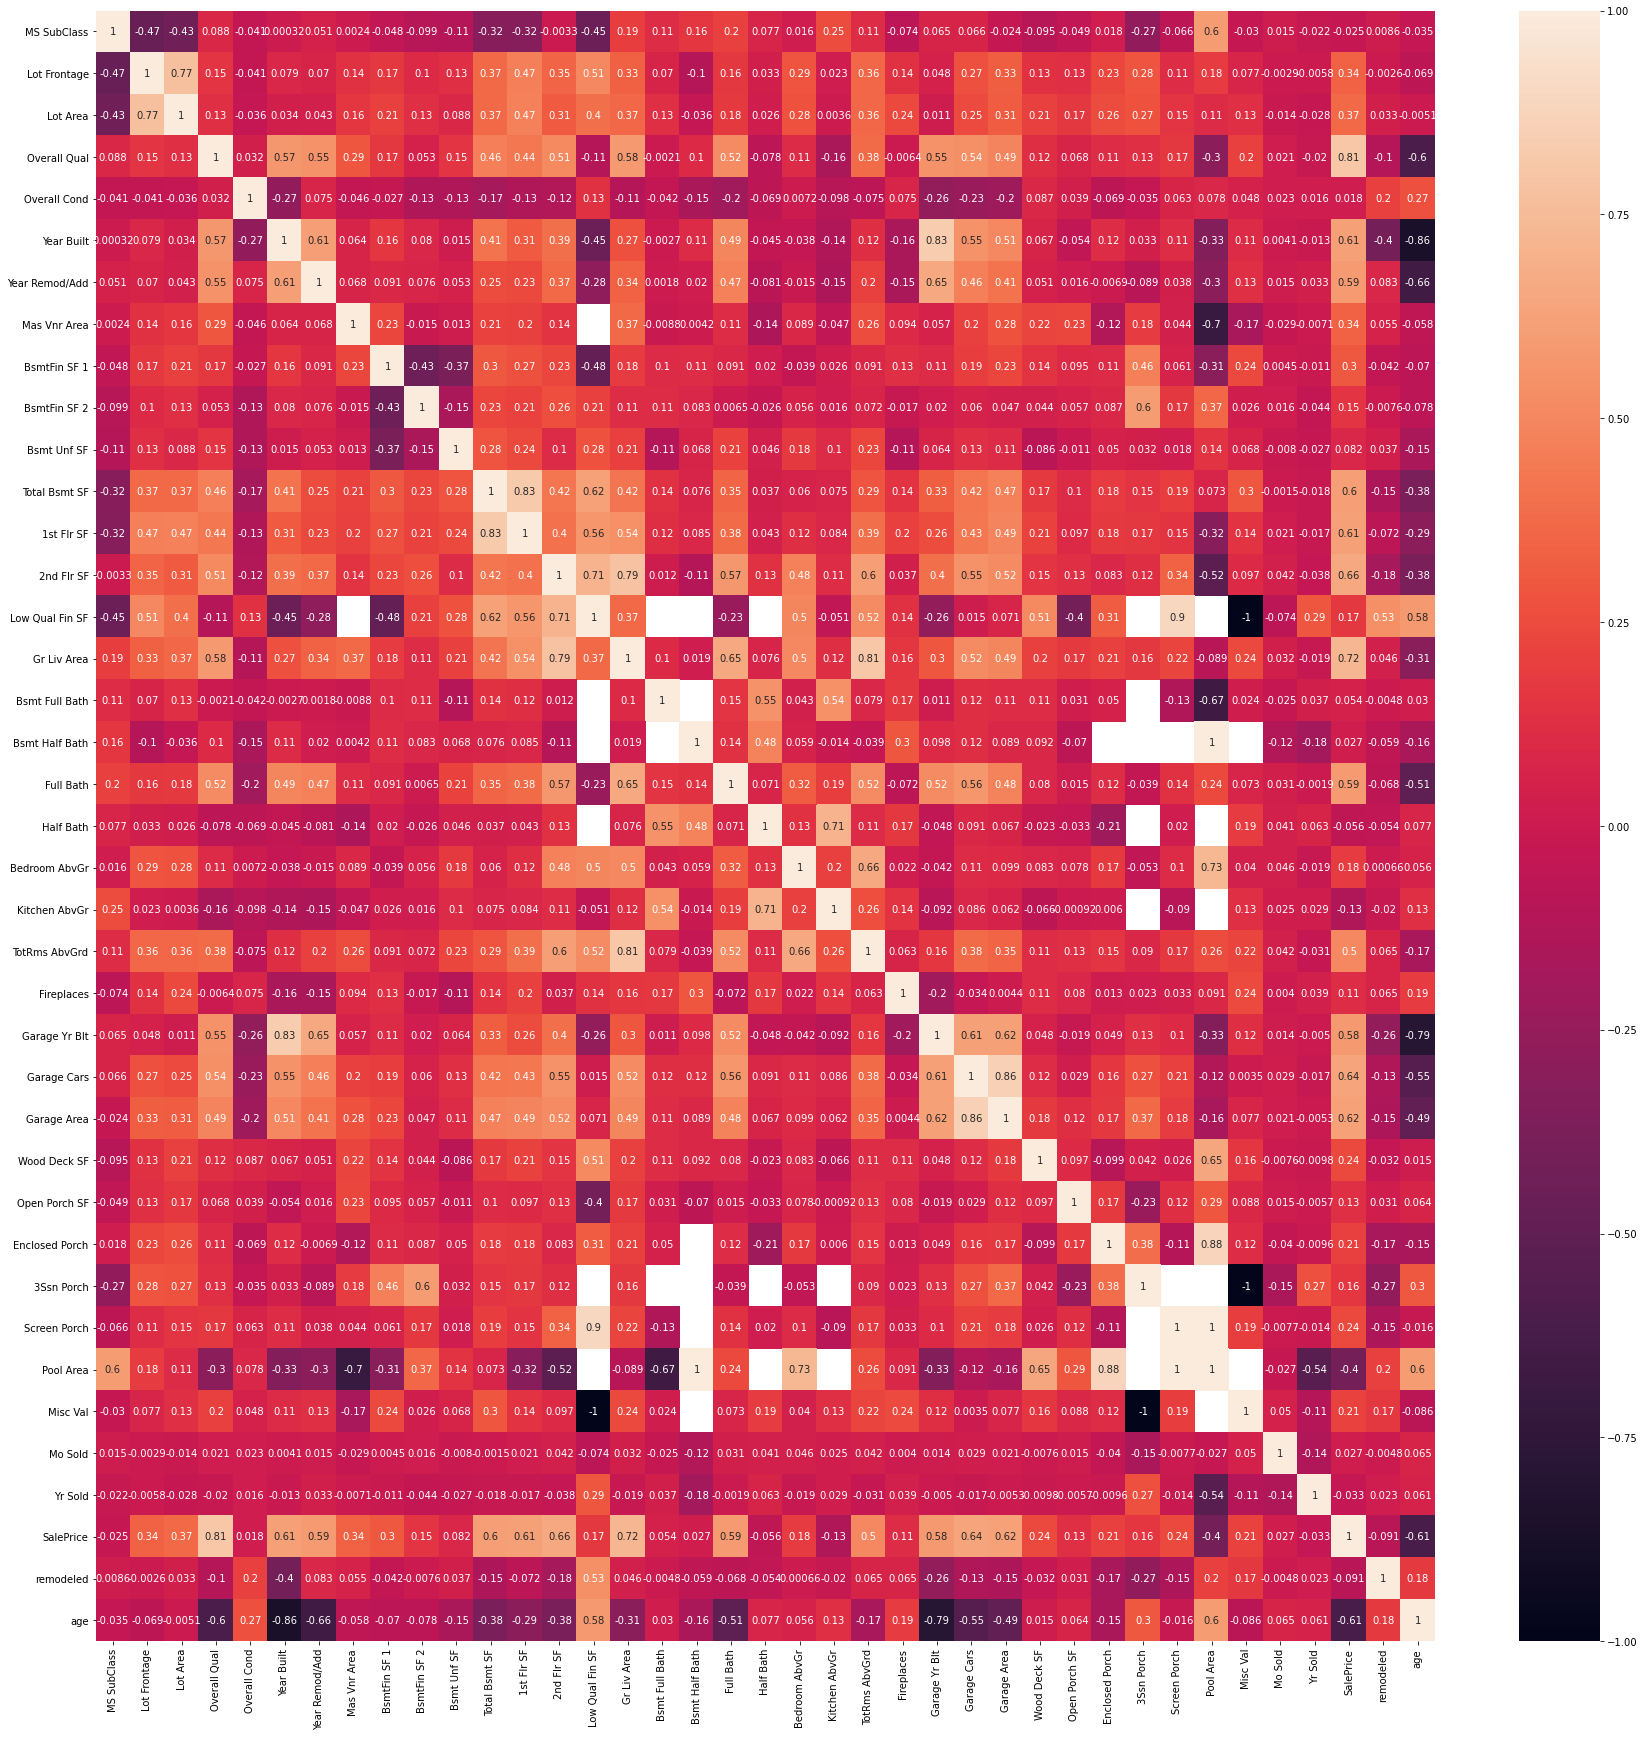

In [177]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cormat,annot=True)
plt.show()

In [178]:
cormat_dummies=df_dummies.corr()
round(cormat_dummies,2)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,ms_type_1-STORY W/FINISHED ATTIC ALL AGES,ms_type_2 FAMILY CONVERSION - ALL STYLES AND AGES,ms_type_2-1/2 STORY ALL AGES,ms_type_2-STORY 1945 & OLDER,ms_type_2-STORY 1946 & NEWER,ms_type_2-STORY PUD - 1946 & NEWER,ms_type_DUPLEX - ALL STYLES AND AGES,ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,ms_type_SPLIT FOYER,ms_type_SPLIT OR MULTI-LEVEL
MS SubClass,1.00,-0.08,-0.43,0.09,-0.04,0.00,0.05,-0.02,-0.07,-0.10,...,-0.01,0.30,0.07,0.14,0.21,0.39,0.19,0.15,0.12,0.17
Lot Frontage,-0.08,1.00,0.02,0.02,0.01,-0.05,0.03,-0.03,-0.10,-0.03,...,-0.00,0.04,0.02,0.04,-0.04,-0.07,0.01,-0.02,-0.05,-0.05
Lot Area,-0.43,0.02,1.00,0.13,-0.04,0.03,0.04,0.10,0.06,0.07,...,0.01,0.03,0.02,-0.01,0.20,-0.55,0.01,-0.21,0.01,0.07
Overall Qual,0.09,0.02,0.13,1.00,0.03,0.57,0.55,0.40,0.12,-0.06,...,-0.01,-0.11,0.04,-0.02,0.32,0.00,-0.13,-0.08,-0.05,0.01
Overall Cond,-0.04,0.01,-0.04,0.03,1.00,-0.27,0.07,-0.11,0.07,0.08,...,0.05,-0.00,0.06,0.16,-0.10,-0.05,-0.10,0.01,0.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ms_type_2-STORY PUD - 1946 & NEWER,0.39,-0.07,-0.55,0.00,-0.05,0.10,0.03,0.06,-0.02,-0.02,...,-0.01,-0.03,-0.02,-0.05,-0.11,1.00,-0.04,-0.02,-0.03,-0.04
ms_type_DUPLEX - ALL STYLES AND AGES,0.19,0.01,0.01,-0.13,-0.10,-0.03,-0.12,-0.01,-0.08,-0.03,...,-0.01,-0.03,-0.02,-0.04,-0.10,-0.04,1.00,-0.02,-0.03,-0.04
ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.15,-0.02,-0.21,-0.08,0.01,0.03,0.01,-0.02,0.05,0.00,...,-0.00,-0.01,-0.01,-0.02,-0.04,-0.02,-0.02,1.00,-0.01,-0.02
ms_type_SPLIT FOYER,0.12,-0.05,0.01,-0.05,0.05,0.01,-0.03,-0.01,0.09,0.03,...,-0.01,-0.02,-0.01,-0.03,-0.06,-0.03,-0.03,-0.01,1.00,-0.03


In [184]:
cormat_dummies[cormat_dummies>.5]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,ms_type_1-STORY W/FINISHED ATTIC ALL AGES,ms_type_2 FAMILY CONVERSION - ALL STYLES AND AGES,ms_type_2-1/2 STORY ALL AGES,ms_type_2-STORY 1945 & OLDER,ms_type_2-STORY 1946 & NEWER,ms_type_2-STORY PUD - 1946 & NEWER,ms_type_DUPLEX - ALL STYLES AND AGES,ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,ms_type_SPLIT FOYER,ms_type_SPLIT OR MULTI-LEVEL
MS SubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Area,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Qual,NaN,NaN,NaN,1.0,NaN,0.57366,0.552761,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Cond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ms_type_2-STORY PUD - 1946 & NEWER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ms_type_DUPLEX - ALL STYLES AND AGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ms_type_SPLIT FOYER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
